In [22]:

from matplotlib.colors import LinearSegmentedColormap
import gsw
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import PolyCollection
from scipy.interpolate import griddata
from scipy.spatial import KDTree
from matplotlib.colors import ListedColormap
import matplotlib.patches as Patches
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import xarray as xr
import cmocean.cm as cmo 
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
import matplotlib as mpl
from scipy.spatial import Delaunay
from Utiles import area_weighted_average, calculate_area_percentages

# Data

In [24]:
u = 0
tfs = 20 
afs = 18 
tifs = 15 
cbfs = 18
ctfs = 15

radius = 750000

n = 800000
m = n + 100000

colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.8, 
}

In [25]:
path1 ='../../../automated_testing/integrated_tests/idealised/Thule/results_CQNC_250/'
path2 ='../../../automated_testing/integrated_tests/idealised/Thule/results_WQNC_250/'

## COLD

In [26]:
CoQuad1 = xr.open_dataset(path1 + 'main_output_ANT_00001.nc')
CoQuad2 = xr.open_dataset(path1 + 'main_output_ANT_00002.nc')
CoQuad3 = xr.open_dataset(path1 + 'main_output_ANT_00003.nc')

Hi1 = CoQuad1['Hi']
Hs1 = CoQuad1['Hi']
Hib1 = CoQuad1['Hib']
Hb1 = CoQuad1['Hb']
BMB1 = CoQuad1['BMB']
Va1 = CoQuad1['V']
V1 = Va1.T
Tria1 = CoQuad1['Tri'] - 1  
Tri1 = Tria1.T
triang1 = tri.Triangulation(V1[:, 0], V1[:, 1], Tri1)

Hi2 = CoQuad2['Hi']
BMB2 = CoQuad2['BMB']
Va2 = CoQuad2['V']
V2 = Va2.T
Tria2 = CoQuad2['Tri'] - 1  
Tri2 = Tria2.T
triang2 = tri.Triangulation(V2[:, 0], V2[:, 1], Tri2)

Hi3 = CoQuad3['Hi']
BMB3 = CoQuad3['BMB']   
Va3 = CoQuad3['V']
V3 = Va3.T
Tria3 = CoQuad3['Tri'] - 1  
Tri3 = Tria3.T
triang3 = tri.Triangulation(V3[:, 0], V3[:, 1], Tri3)

year = np.arange(0, 251, 50)

distances1 = np.sqrt(V1[:, 0]**2 + V1[:, 1]**2)
mask_ocean1 = distances1 <= radius

distances2 = np.sqrt(V2[:, 0]**2 + V2[:, 1]**2)
mask_ocean2 = distances2 <= radius

distances3 = np.sqrt(V3[:, 0]**2 + V3[:, 1]**2)
mask_ocean3 = distances3 <= radius

mask_gr1 = CoQuad1['mask_grounded_ice']
mask_gr2 = CoQuad2['mask_grounded_ice']
mask_gr3 = CoQuad3['mask_grounded_ice']

GL1 = CoQuad1['grounding_line']
GL2 = CoQuad2['grounding_line']
GL3 = CoQuad3['grounding_line']

## WARM

In [27]:
WaQuad1 = xr.open_dataset(path2 + 'main_output_ANT_00001.nc')
WaQuad2 = xr.open_dataset(path2 + 'main_output_ANT_00002.nc')
WaQuad3 = xr.open_dataset(path2 + 'main_output_ANT_00003.nc')
WaQuad4 = xr.open_dataset(path2 + 'main_output_ANT_00004.nc')
WaQuad5 = xr.open_dataset(path2 + 'main_output_ANT_00005.nc')
WaQuad6 = xr.open_dataset(path2 + 'main_output_ANT_00006.nc')

Hi1w = WaQuad1['Hi']
BMB1w = WaQuad1['BMB']
Va1w = WaQuad1['V']
V1w = Va1w.T
Tria1w = WaQuad1['Tri'] - 1  
Tri1w = Tria1w.T
triang1w = tri.Triangulation(V1w[:, 0], V1w[:, 1], Tri1w)

Hi2w = WaQuad2['Hi']
BMB2w = WaQuad2['BMB']
Va2w = WaQuad2['V']
V2w = Va2w.T
Tria2w = WaQuad2['Tri'] - 1  
Tri2w = Tria2w.T
triang2w = tri.Triangulation(V2w[:, 0], V2w[:, 1], Tri2w)

Hi3w = WaQuad3['Hi']
BMB3w = WaQuad3['BMB']
Va3w = WaQuad3['V']
V3w = Va3w.T
Tria3w = WaQuad3['Tri'] - 1  
Tri3w = Tria3w.T
triang3w = tri.Triangulation(V3w[:, 0], V3w[:, 1], Tri3w)

Hi4w = WaQuad4['Hi']
BMB4w = WaQuad4['BMB']
Va4w = WaQuad4['V']
V4w = Va4w.T
Tria4w = WaQuad4['Tri'] - 1  
Tri4w = Tria4w.T
triang4w = tri.Triangulation(V4w[:, 0], V4w[:, 1], Tri4w)

Hi5w = WaQuad5['Hi']
BMB5w = WaQuad5['BMB']
Va5w = WaQuad5['V']
V5w = Va5w.T
Tria5w = WaQuad5['Tri'] - 1  
Tri5w = Tria5w.T
triang5w = tri.Triangulation(V5w[:, 0], V5w[:, 1], Tri5w)

Hi6w = WaQuad6['Hi']
BMB6w = WaQuad6['BMB']
Va6w = WaQuad6['V']
V6w = Va6w.T
Tria6w = WaQuad6['Tri'] - 1  
Tri6w = Tria6w.T
triang6w = tri.Triangulation(V6w[:, 0], V6w[:, 1], Tri6w)

distances1w = np.sqrt(V1w[:, 0]**2 + V1w[:, 1]**2)
mask_ocean1w = distances1w <= radius

distances2w = np.sqrt(V2w[:, 0]**2 + V2w[:, 1]**2)
mask_ocean2w = distances2w <= radius

distances3w = np.sqrt(V3w[:, 0]**2 + V3w[:, 1]**2)
mask_ocean3w = distances3w <= radius

distances4w = np.sqrt(V4w[:, 0]**2 + V4w[:, 1]**2)
mask_ocean4w = distances4w <= radius

distances5w = np.sqrt(V5w[:, 0]**2 + V5w[:, 1]**2)
mask_ocean5w = distances5w <= radius

distances6w = np.sqrt(V6w[:, 0]**2 + V6w[:, 1]**2)
mask_ocean6w = distances6w <= radius

# Results

## Ice thickness and elevation YEAR 0

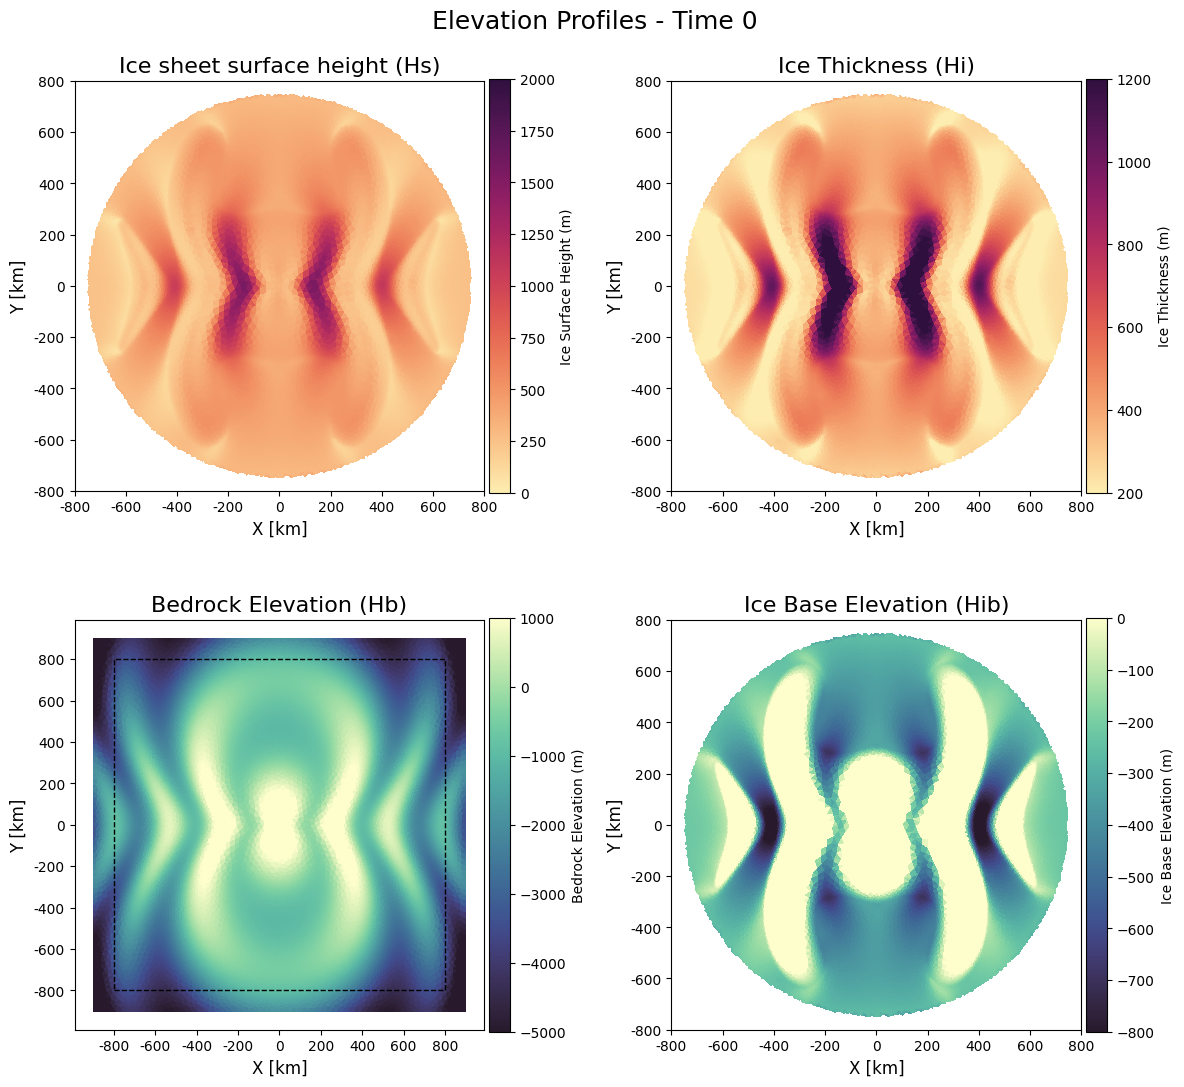

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f'Elevation Profiles - Time {u}', fontsize=18, x=0.5, y=0.92)


c0 = ax[0, 0].tripcolor(triang1, Hs1[0].where(mask_ocean1), cmap=cmo.matter, vmin = 0 , vmax = 2000)
fig.colorbar(c0, ax=ax[0, 0], label="Ice Surface Height (m)", **colorbar_kwargs)
ax[0, 0].set_title('Ice sheet surface height (Hs)', fontsize=14)
#cont0 = ax[0, 0].tricontour(triang, Hs_l[u], levels=[0, 500, 1000, 1500], colors='k', linewidths=1)
#ax[0, 0].clabel(cont0, inline=True, fontsize=8)
ax[0, 0].set_xlim(-n,n)
ax[0, 0].set_ylim(-n,n)


c1 = ax[0, 1].tripcolor(triang1, Hi1[0].where(mask_ocean1), cmap=cmo.matter, vmin = 200, vmax=1200)
fig.colorbar(c1, ax=ax[0, 1], label="Ice Thickness (m)", **colorbar_kwargs)
ax[0, 1].set_title('Ice Thickness (Hi)', fontsize=14)
#cont1 = ax[0, 1].tricontour(triang, Hi_l[u], levels=[0, 500, 1000, 1500], colors='k', linewidths=1)
#ax[0, 1].clabel(cont1, inline=True, fontsize=8)
ax[0, 1].set_xlim(-n,n)
ax[0, 1].set_ylim(-n,n)


c2 = ax[1, 0].tripcolor(triang1, Hb1[0], cmap=cmo.deep_r, vmin=-5000, vmax=1000)
fig.colorbar(c2, ax=ax[1, 0], label="Bedrock Elevation (m)", **colorbar_kwargs)
ax[1, 0].set_title('Bedrock Elevation (Hb)', fontsize=14)
#cont2 = ax[1, 0].tricontour(triang, Hb_l[u], levels=[-700, -500, -250, 0, 250], colors='k', linewidths=1)
#ax[1, 0].clabel(cont2, inline=True, fontsize=8)
box_x = [-800000, 800000, 800000, -800000, -800000]
box_y = [-800000, -800000, 800000, 800000, -800000]
ax[1, 0].plot(box_x, box_y, color='black', linestyle='--', linewidth=1)


c3 = ax[1, 1].tripcolor(triang1, Hib1[0].where(mask_ocean1), cmap=cmo.deep_r , vmin = -800, vmax=0)
fig.colorbar(c3, ax=ax[1, 1], label="Ice Base Elevation (m)", **colorbar_kwargs)
ax[1, 1].set_title('Ice Base Elevation (Hib)', fontsize=14)
#cont3 = ax[1, 1].tricontour(triang, Hs_l[u] - Hi_l[u], levels=[-600, -300, 0, 300], colors='k', linewidths=1)
#ax[1, 1].clabel(cont3, inline=True, fontsize=8)
ax[1, 1].set_xlim(-n,n)
ax[1, 1].set_ylim(-n,n)
 

for i in range(2):
    for j in range(2):
        ax[i, j].set_aspect('equal')
        ax[i, j].title.set_fontsize(16)
        ax[i, j].set_xlabel('X [km]', fontsize=12)
        ax[i, j].set_ylabel('Y [km]', fontsize=12)
        ax[i, j].set_xticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_yticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### COLD

In [55]:
# Define colormap and normalization
cmapHi = cmo.haline_r
boundsHi = [0, 100, 200, 300, 400]  
boundsHi = [300,400,500,600,700,800]
normHi = mpl.colors.BoundaryNorm(boundsHi, cmapHi.N, extend='max')

# Define colormap and normalization
cmapBMB = mpl.colormaps['afmhot']
#bounds = [-0.6, -0.4, -0.2, 0.0 ,0.2]  # Extended to include 0
boundsBMB = [-2, -1.5, -1, -0.5,0, 0.5] 
normBMB = mpl.colors.BoundaryNorm(boundsBMB, cmapBMB.N, extend='max')



/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_4481/4245919302.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


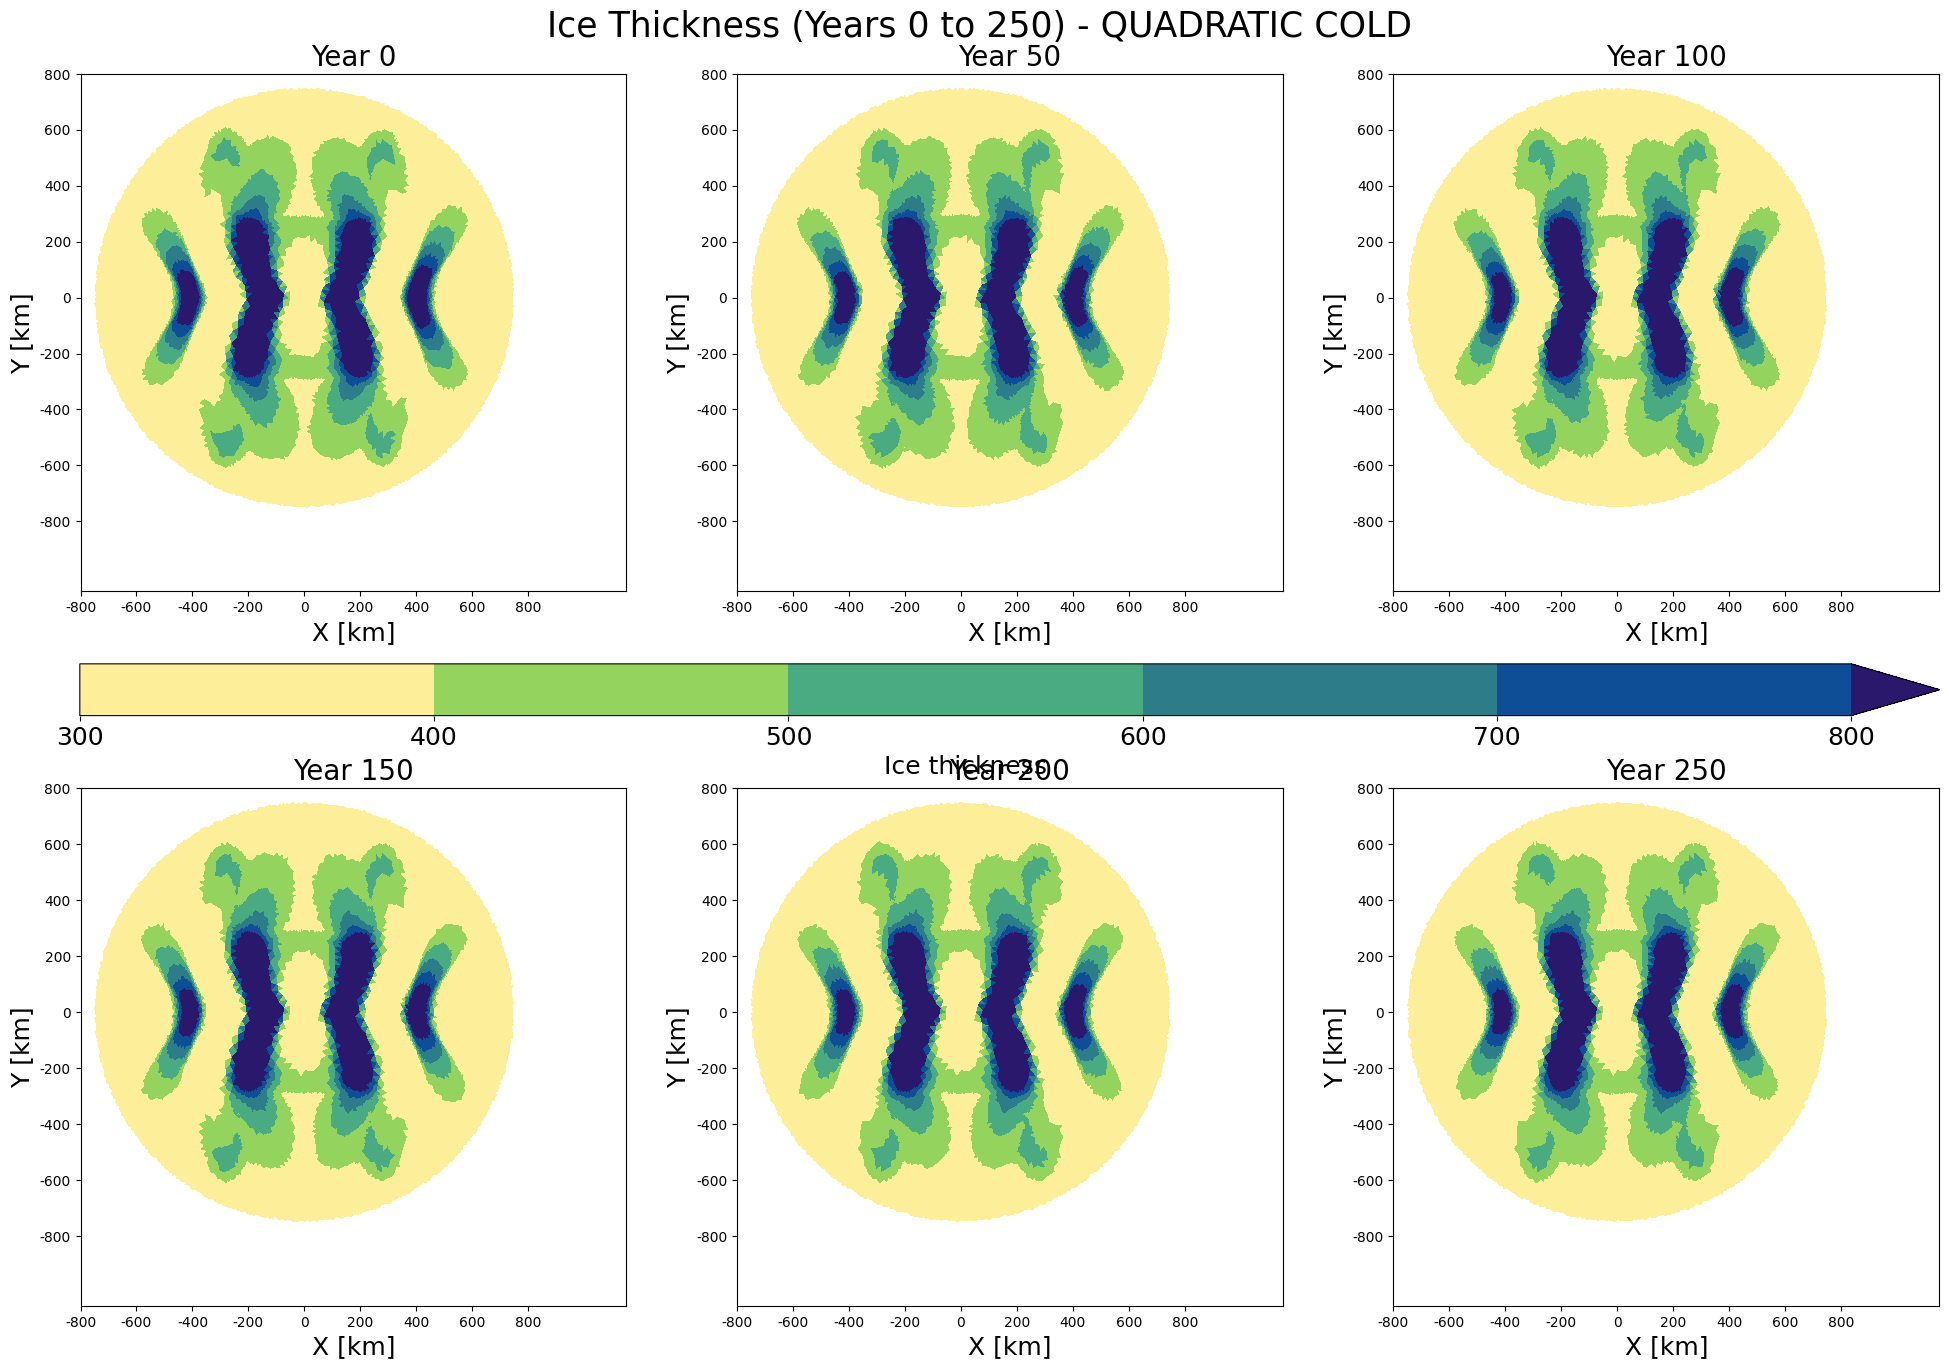

In [56]:
fig = plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.1, 1], hspace=0.2, wspace=0.2)

axes = []
for i in range(6):
    if i < 3:
        axes.append(plt.subplot(gs[0, i]))  # First row
    else:
        axes.append(plt.subplot(gs[2, i-3]))  # Third row

# Plot ice thickness
c0 = axes[0].tripcolor(triang1, Hi1[0].where(mask_ocean1),norm = normHi, cmap=cmapHi)
c50 = axes[1].tripcolor(triang2, Hi2[4].where(mask_ocean2),norm = normHi, cmap=cmapHi)
c100= axes[2].tripcolor(triang2, Hi2[9].where(mask_ocean2),norm = normHi, cmap=cmapHi)
c150 = axes[3].tripcolor(triang2, Hi2[14].where(mask_ocean2),norm = normHi, cmap=cmapHi)
c200 = axes[4].tripcolor(triang3, Hi3[1].where(mask_ocean3),norm = normHi, cmap=cmapHi)
c250 = axes[5].tripcolor(triang3, Hi3[6].where(mask_ocean3),norm = normHi, cmap=cmapHi)

#axes[0].plot(GL1[:, 0], GL1[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[1].plot(GL2[:, 0], GL2[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[2].plot(GL2[:, 0], GL2[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[3].plot(GL2[:, 0], GL2[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[4].plot(GL3[:, 0], GL3[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[5].plot(GL3[:, 0], GL3[:, 1], 'k--', linewidth=2, label='Grounding Line')

for i in range(6):
    ax = axes[i]
    # Set main plot properties
    ax.set_title(f'Year {year[i]}', fontsize=tfs)
    ax.set_xlabel('X [km]', fontsize=afs)
    ax.set_ylabel('Y [km]', fontsize=afs)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_xlim(-n, m+250000)
    ax.set_ylim(-m-150000, n)
    ax.set_aspect('equal')

# Add colorbar using the middle row of the gridspec
cbar_ax = plt.subplot(gs[1, :])  # Middle row, all columns
cbar = fig.colorbar(c0, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Ice thickness', fontsize=afs)
cbar.ax.tick_params(labelsize=afs)


plt.suptitle('Ice Thickness (Years 0 to 250) - QUADRATIC COLD', fontsize=tfs+5, y=0.92)  

plt.tight_layout()
plt.show()

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_4481/1387979207.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


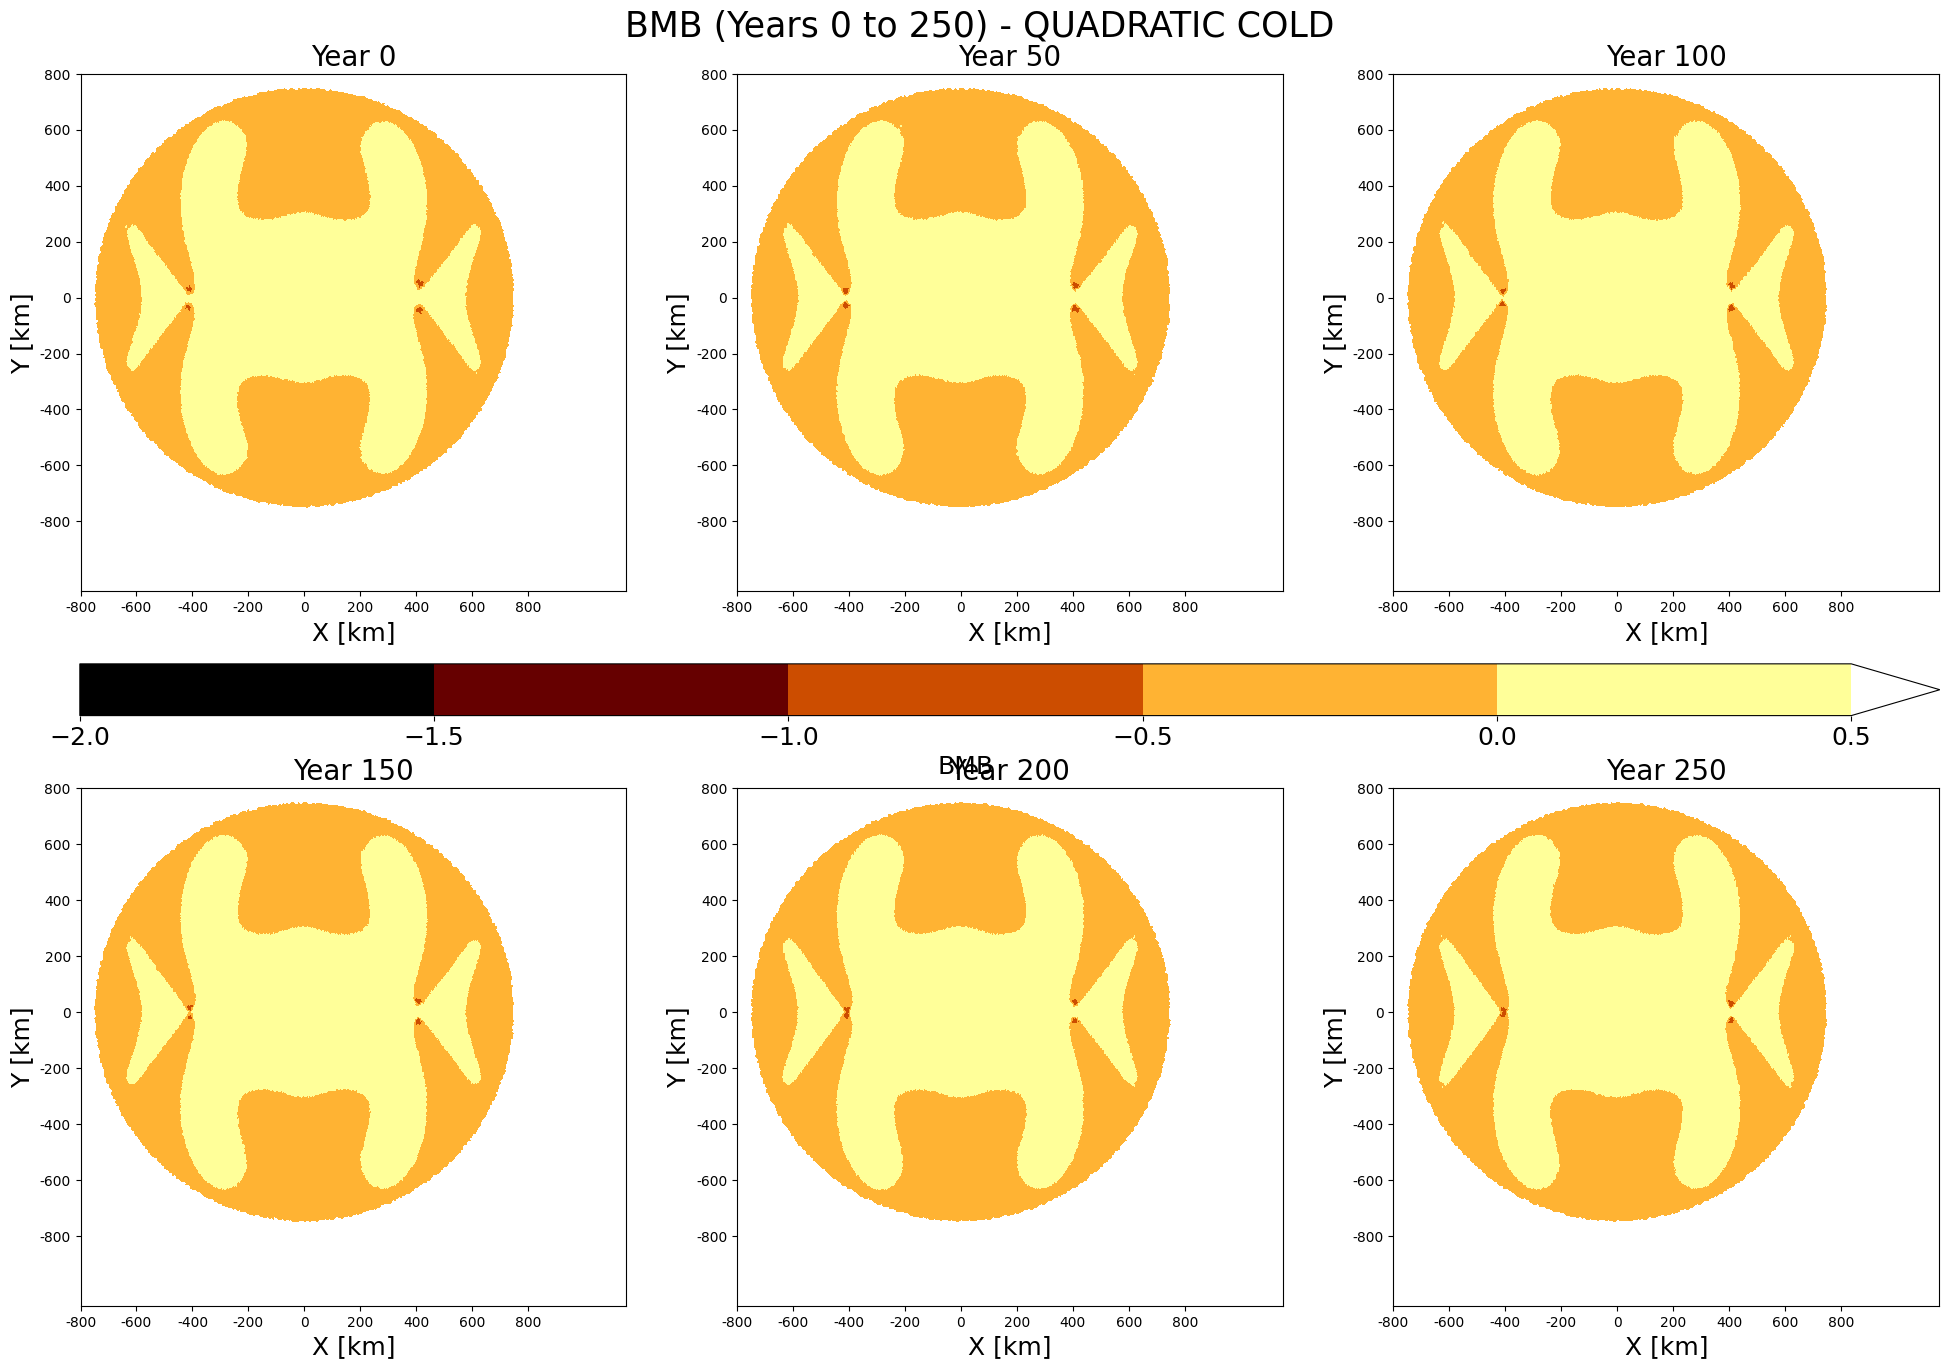

In [57]:
fig = plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.1, 1], hspace=0.2, wspace=0.2)

axes = []
for i in range(6):
    if i < 3:
        axes.append(plt.subplot(gs[0, i]))  # First row
    else:
        axes.append(plt.subplot(gs[2, i-3]))  # Third row

# Plot ice thickness
c0 = axes[0].tripcolor(triang1, BMB1[0].where(mask_ocean1),norm = normBMB, cmap=cmapBMB)
c50 = axes[1].tripcolor(triang2, BMB2[4].where(mask_ocean2),norm = normBMB, cmap=cmapBMB)
c100= axes[2].tripcolor(triang2, BMB2[9].where(mask_ocean2),norm = normBMB, cmap=cmapBMB)
c150 = axes[3].tripcolor(triang2, BMB2[14].where(mask_ocean2),norm = normBMB, cmap=cmapBMB)
c200 = axes[4].tripcolor(triang3, BMB3[1].where(mask_ocean3),norm = normBMB, cmap=cmapBMB)
c250 = axes[5].tripcolor(triang3, BMB3[6].where(mask_ocean3),norm = normBMB, cmap=cmapBMB)


for i in range(6):
    ax = axes[i]
    # Set main plot properties
    ax.set_title(f'Year {year[i]}', fontsize=tfs)
    ax.set_xlabel('X [km]', fontsize=afs)
    ax.set_ylabel('Y [km]', fontsize=afs)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_xlim(-n, m+250000)
    ax.set_ylim(-m-150000, n)
    ax.set_aspect('equal')

# Add colorbar using the middle row of the gridspec
cbar_ax = plt.subplot(gs[1, :])  # Middle row, all columns
cbar = fig.colorbar(c0, cax=cbar_ax, orientation='horizontal')
cbar.set_label('BMB', fontsize=afs)
cbar.ax.tick_params(labelsize=afs)


plt.suptitle('BMB (Years 0 to 250) - QUADRATIC COLD', fontsize=tfs+5, y=0.92)  

plt.tight_layout()
plt.show()

### WARM

In [58]:
Hi2w

<xarray.DataArray 'Hi' (time: 3, vi: 25307)> Size: 607kB
[75921 values with dtype=float64]
Coordinates:
  * time     (time) float64 24B 10.0 20.0 30.0
Dimensions without coordinates: vi
Attributes:
    long_name:  Ice thickness
    units:      m

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_4481/30164335.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


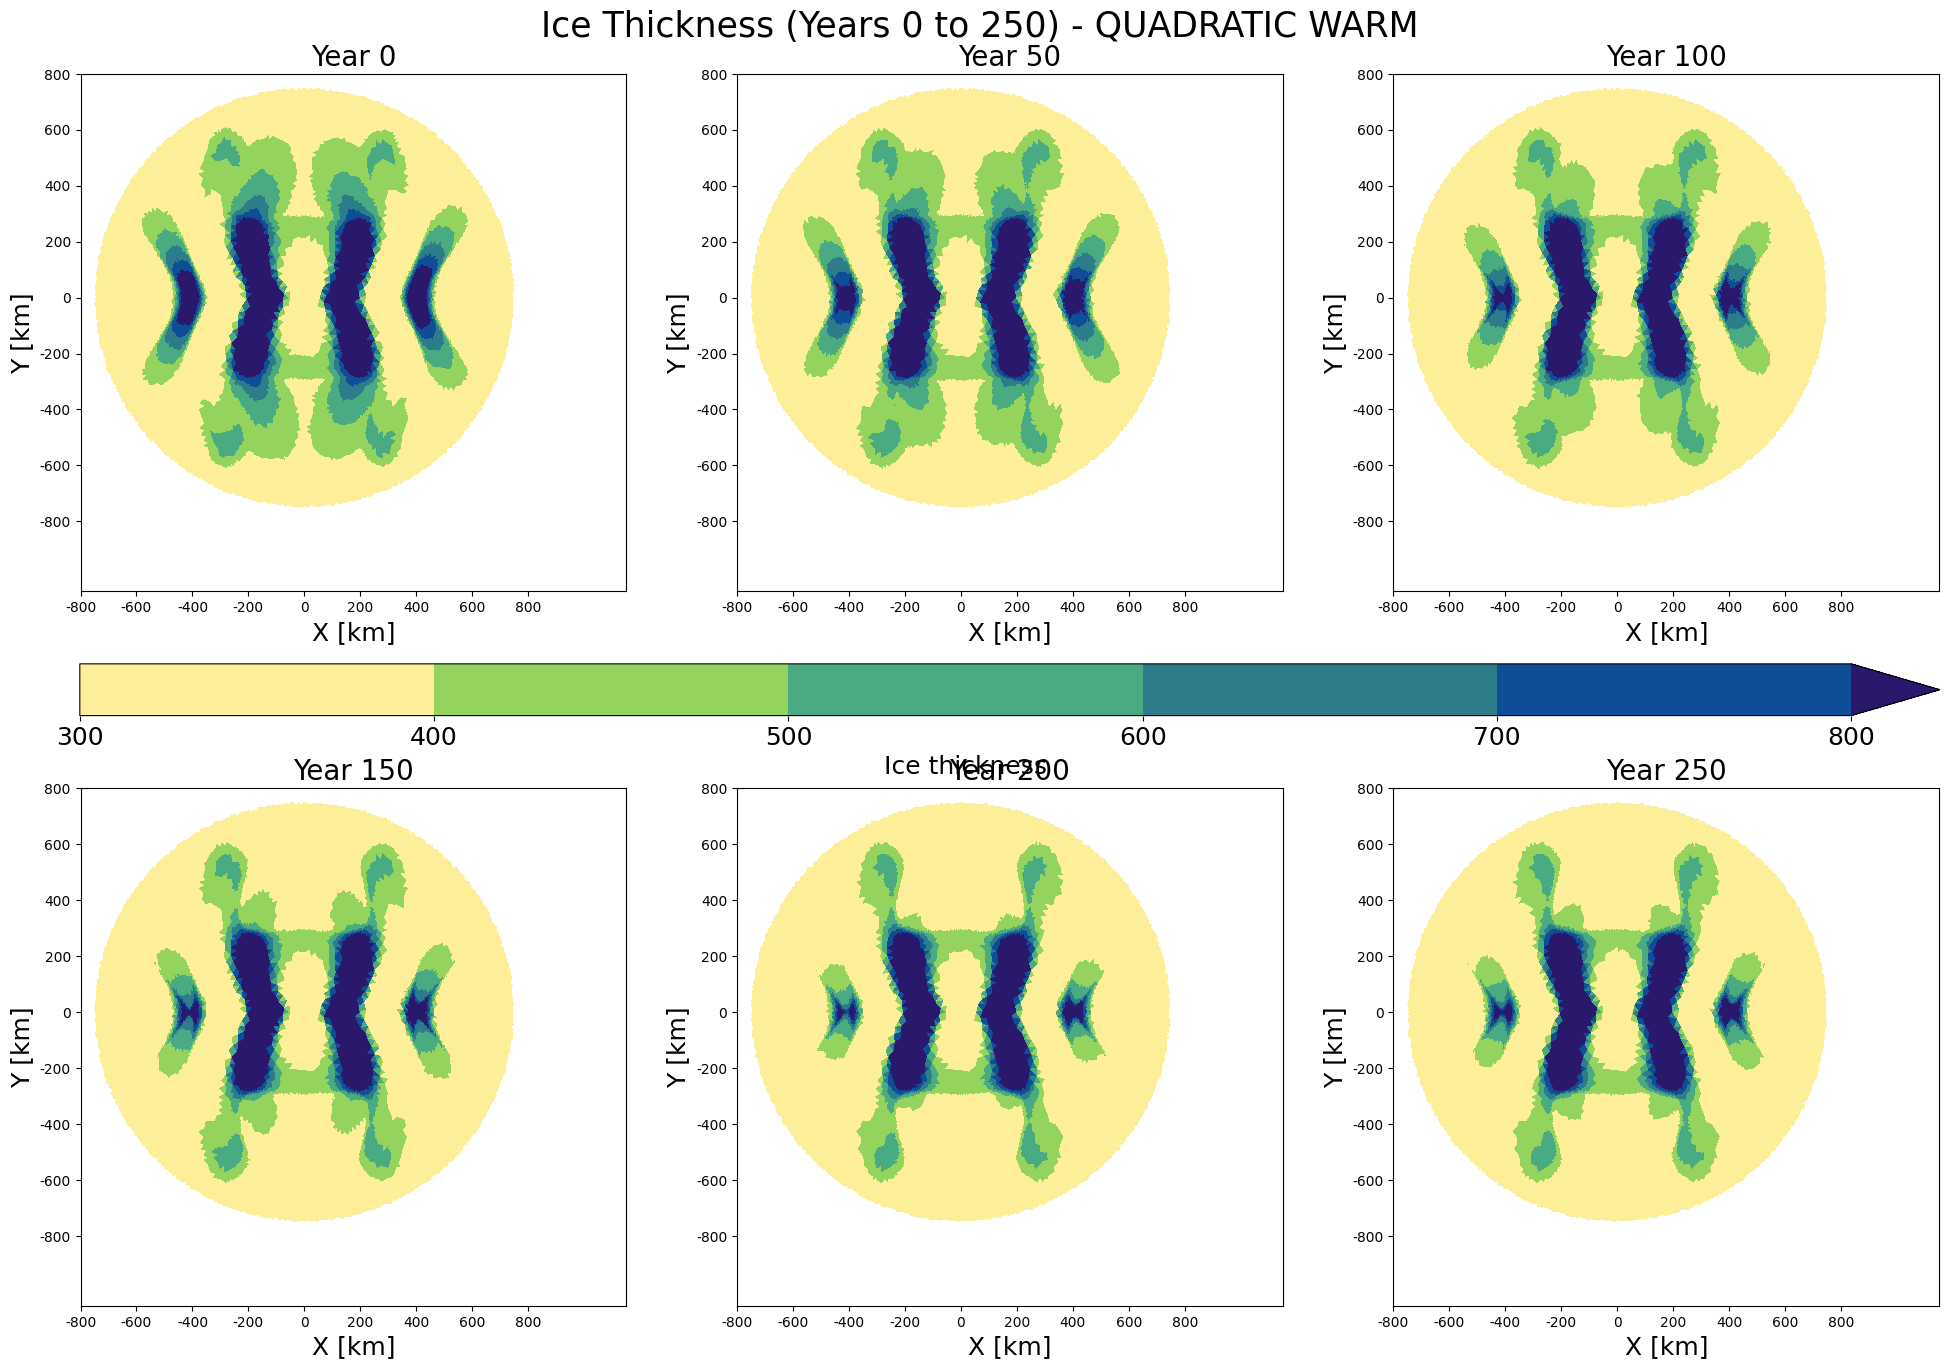

In [59]:
fig = plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.1, 1], hspace=0.2, wspace=0.2)

axes = []
for i in range(6):
    if i < 3:
        axes.append(plt.subplot(gs[0, i]))  # First row
    else:
        axes.append(plt.subplot(gs[2, i-3]))  # Third row

# Plot ice thickness
'''c0 = axes[0].tripcolor(triang1w, Hi1w[0].where(mask_ocean1w),norm = normHi, cmap=cmapHi)
c50 = axes[1].tripcolor(triang3w, Hi3w[1].where(mask_ocean3w),norm = normHi, cmap=cmapHi)
c100= axes[2].tripcolor(triang4w, Hi4w[3].where(mask_ocean4w),norm = normHi, cmap=cmapHi)
c150 = axes[3].tripcolor(triang5w, Hi5w[3].where(mask_ocean5w),norm = normHi, cmap=cmapHi)
c200 = axes[4].tripcolor(triang6w, Hi6w[1].where(mask_ocean6w),norm = normHi, cmap=cmapHi)
c250 = axes[5].tripcolor(triang6w, Hi6w[6].where(mask_ocean6w),norm = normHi, cmap=cmapHi)
'''
c0 = axes[0].tripcolor(triang1w, Hi1w[0].where(mask_ocean1w),norm = normHi, cmap=cmapHi)
c50 = axes[1].tripcolor(triang2w, Hi2w[0].where(mask_ocean2w),norm = normHi, cmap=cmapHi)
c100= axes[2].tripcolor(triang2w, Hi2w[1].where(mask_ocean2w),norm = normHi, cmap=cmapHi)
c150 = axes[3].tripcolor(triang2w, Hi2w[2].where(mask_ocean2w),norm = normHi, cmap=cmapHi)
c200 = axes[4].tripcolor(triang3w, Hi3w[1].where(mask_ocean3w),norm = normHi, cmap=cmapHi)
c250 = axes[5].tripcolor(triang3w, Hi3w[0].where(mask_ocean3w),norm = normHi, cmap=cmapHi)

#axes[0].plot(GL1[:, 0], GL1[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[1].plot(GL2[:, 0], GL2[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[2].plot(GL2[:, 0], GL2[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[3].plot(GL2[:, 0], GL2[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[4].plot(GL3[:, 0], GL3[:, 1], 'k--', linewidth=2, label='Grounding Line')
#axes[5].plot(GL3[:, 0], GL3[:, 1], 'k--', linewidth=2, label='Grounding Line')

for i in range(6):
    ax = axes[i]
    # Set main plot properties
    ax.set_title(f'Year {year[i]}', fontsize=tfs)
    ax.set_xlabel('X [km]', fontsize=afs)
    ax.set_ylabel('Y [km]', fontsize=afs)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_xlim(-n, m+250000)
    ax.set_ylim(-m-150000, n)
    ax.set_aspect('equal')


# Add colorbar using the middle row of the gridspec
cbar_ax = plt.subplot(gs[1, :])  # Middle row, all columns
cbar = fig.colorbar(c0, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Ice thickness', fontsize=afs)
cbar.ax.tick_params(labelsize=afs)


plt.suptitle('Ice Thickness (Years 0 to 250) - QUADRATIC WARM', fontsize=tfs+5, y=0.92)  

plt.tight_layout()
plt.show()

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_4481/4209749645.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


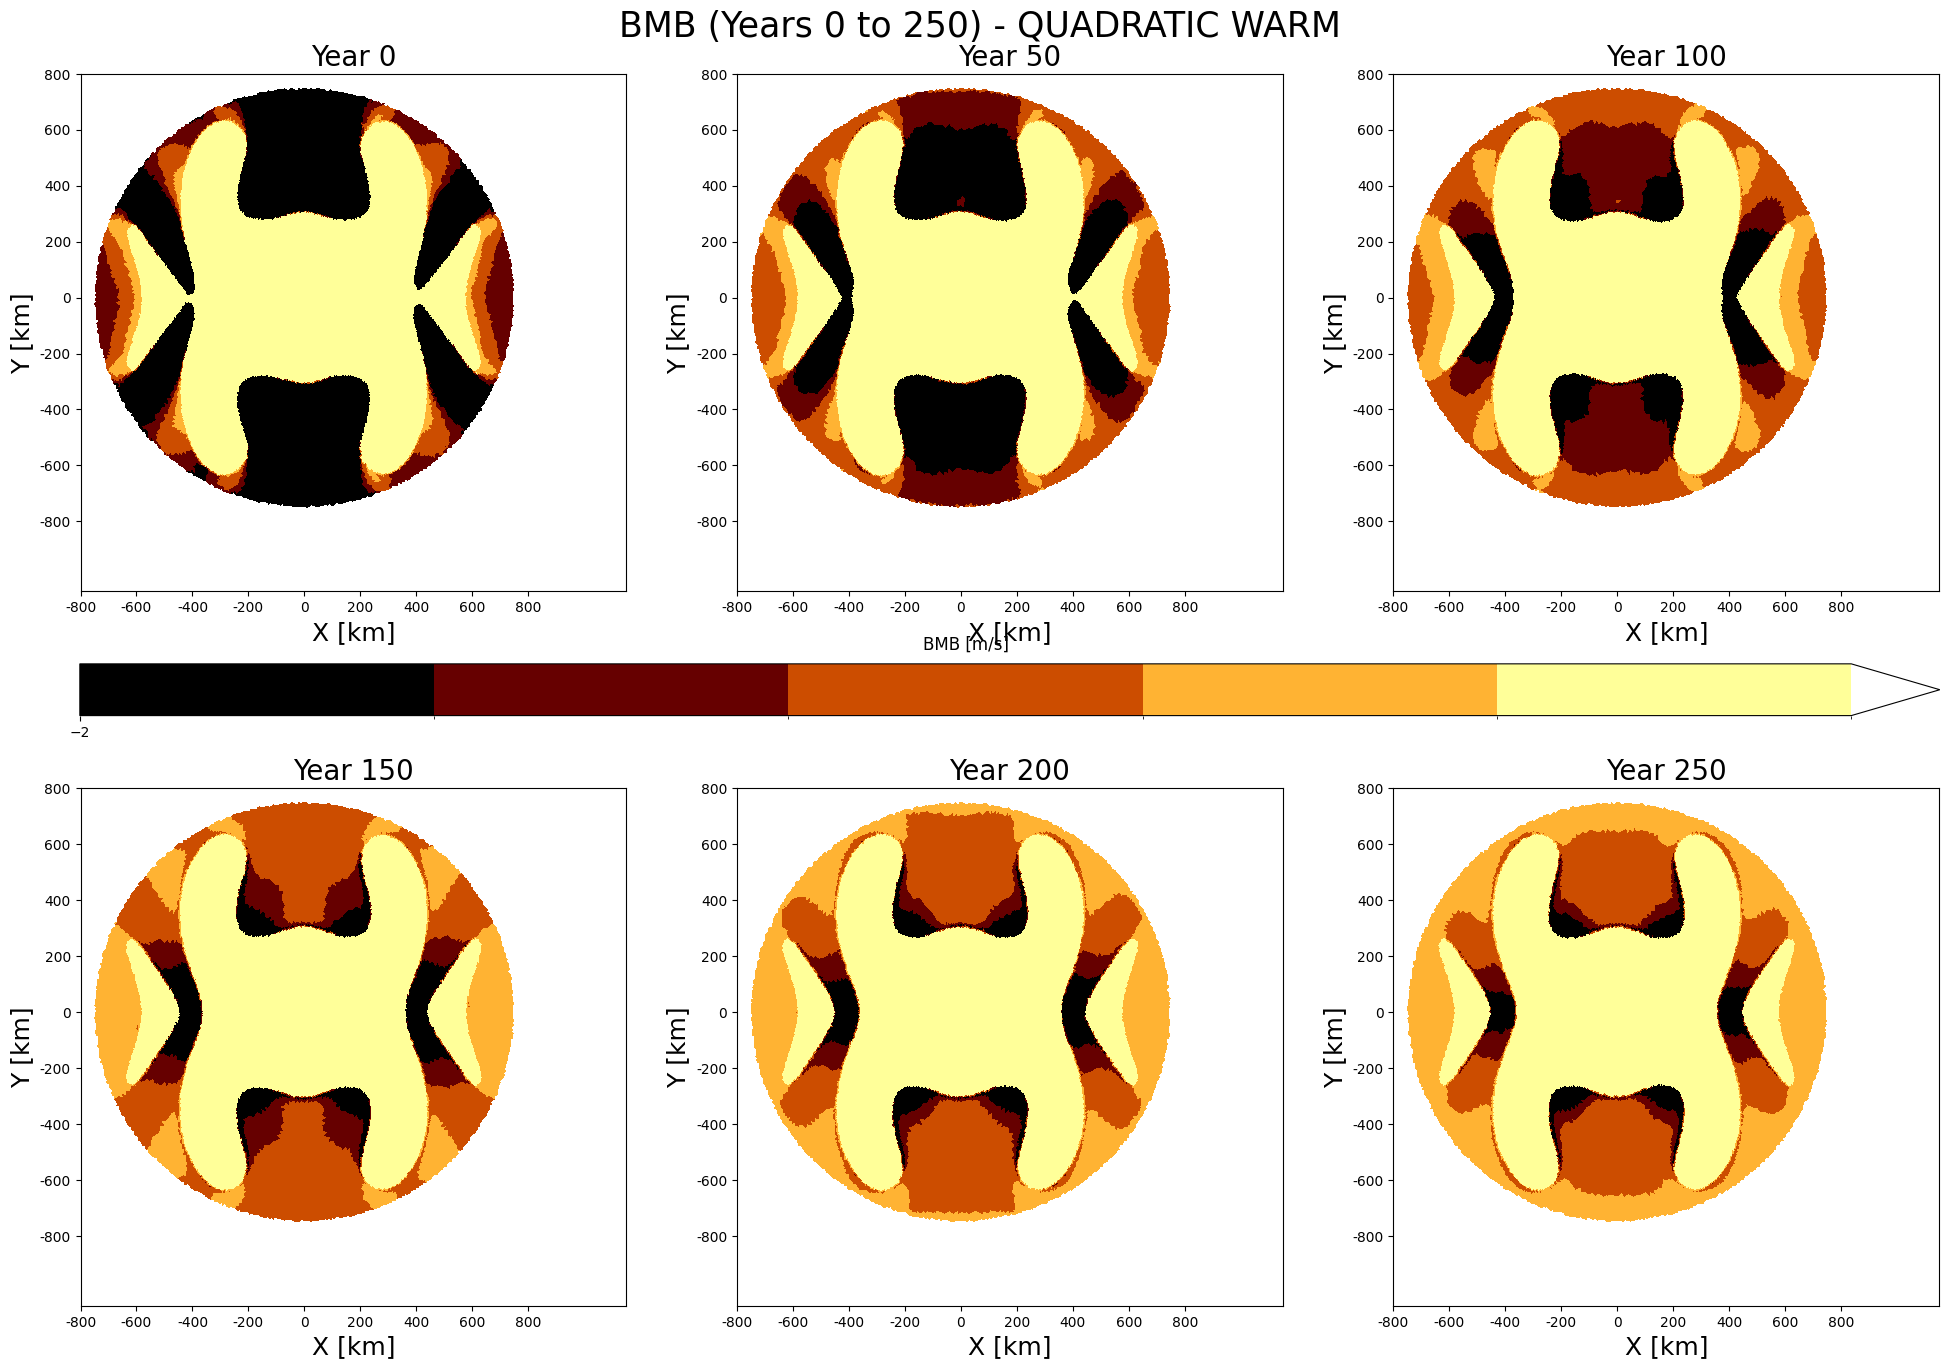

In [60]:
# Define colormap and normalization
cmap = mpl.colormaps['afmhot']
#bounds = [-6, -4, -2, 0] 
bounds = [-2, -1.5, -1, -0.5,0, 0.5] 
   # -20, -18, -16, -14, 12, -10 , -8, 
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='max')

# Create figure
fig = plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.1, 1], hspace=0.2, wspace=0.2)

axes = []
for i in range(6):
    if i < 3:
        axes.append(plt.subplot(gs[0, i]))  # First row
    else:
        axes.append(plt.subplot(gs[2, i-3]))  # Third row

# Plot ice thickness
c0 = axes[0].tripcolor(triang1w, BMB1w[0].where(mask_ocean1w),norm=normBMB, cmap=cmapBMB)
c50 = axes[1].tripcolor(triang3w, BMB3w[1].where(mask_ocean3w),norm=normBMB, cmap=cmapBMB)
c100 = axes[2].tripcolor(triang4w, BMB4w[3].where(mask_ocean4w),norm=normBMB, cmap=cmapBMB)
c150 = axes[3].tripcolor(triang5w, BMB5w[3].where(mask_ocean5w),norm=normBMB, cmap=cmapBMB)
c200 = axes[4].tripcolor(triang6w, BMB6w[1].where(mask_ocean6w),norm=normBMB, cmap=cmapBMB)
c250 = axes[5].tripcolor(triang6w, BMB6w[6].where(mask_ocean6w),norm=normBMB, cmap=cmapBMB)

for i in range(6):
    ax = axes[i]
    # Set main plot properties
    ax.set_title(f'Year {year[i]}', fontsize=tfs)
    ax.set_xlabel('X [km]', fontsize=afs)
    ax.set_ylabel('Y [km]', fontsize=afs)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_xlim(-n, m+250000)
    ax.set_ylim(-m-150000, n)
    ax.set_aspect('equal')

plt.suptitle('BMB (Years 0 to 250) - QUADRATIC WARM', fontsize=tfs+5, y=0.92)  

'''# Add colorbar using the middle row of the gridspec
cbar_ax = plt.subplot(gs[1, :])  # Middle row, all columns
cbar = fig.colorbar(c0, cax=cbar_ax, orientation='horizontal')
cbar.set_label('BMB', fontsize=afs)
cbar.ax.tick_params(labelsize=afs)
'''
# Colorbar formatting
cax = fig.add_subplot(gs[1, :])  # Span all columns in middle row
cbar = fig.colorbar(c0, cax=cax, orientation='horizontal')
cbar.set_label('BMB [m/s]', fontsize=12, labelpad=10)
cbar.set_ticks(np.linspace(-2, 0, 1))  # Add evenly spaced ticks
cax.xaxis.set_ticks_position('bottom')
cax.xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average melt rate per year
average_melt_rate = BMB.where(mask0 & mask_ocean & (Hib<-300)).mean(dim='vi')

# Plot the average melt rate
plt.figure(figsize=(10, 6))
plt.plot(BMB['time'], average_melt_rate, label='Average Melt Rate', color='blue')
plt.xlabel('Time [years]', fontsize=14)
plt.ylabel('Melt Rate [m/s]', fontsize=14)
plt.title('Average Melt Rate Per Year', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Define colormap and normalization
cmap = cmo.haline_r
bounds = [0, 100, 200, 300, 400]  # Extended to include 0
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='max')

# Get representative colors for each range
solid_colors = {
    '0-100': cmap(norm(50)),      # Midpoint of 0-100 range
    '100-200': cmap(norm(150)),   # Midpoint of 100-200 range
    '200-300': cmap(norm(250)),   # Midpoint of 200-300 range
    '300-400': cmap(norm(350)),   # Midpoint of 300-400 range
    '>400': cmap(norm(450))       # Slightly beyond max bound
}

# Convert to hex codes
hex_colors = {k: mpl.colors.to_hex(v) for k,v in solid_colors.items()}

ranges = [
    (0, 100),
    (100, 200),
    (200, 300),
    (300, 400),
]
# Create figure #############################################################################################################################
fig = plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.1, 1], hspace=0.2, wspace=0.2)

axes = []
for i in range(6):
    if i < 3:
        axes.append(plt.subplot(gs[0, i]))  # First row
    else:
        axes.append(plt.subplot(gs[2, i-3]))  # Third row

legend_handles = [
    Patch(color=solid_colors['0-100'], label='0-100 m'),
    Patch(color=solid_colors['100-200'], label='100-200 m'),
    Patch(color=solid_colors['200-300'], label='200-300 m'),
    Patch(color=solid_colors['300-400'], label='300-400 m'),
    Patch(color=solid_colors['>400'], label='>400 m')
]

# Plot ice thickness
c0 = axes[0].tripcolor(triang1, Hi1[1].where(mask_ocean ),norm = norm, cmap=cmap)
"""

    # Plot grounding line
    #GL = Lad1['grounding_line'][year]
    ax.plot(GL[0, :], GL[1, :], color='black', linewidth=3, label='Grounding Line')

    # Calculate area-weighted percentages
    percentages = calculate_area_percentages(V, Hi_l[year].where(mask0 & mask_ocean), ranges)
    
    # Prepare pie chart data
    sizes = percentages
    colors = list(solid_colors.values())
    
    # Add pie chart in bottom right
    pie_ax = inset_axes(ax, width=1.6, height=1.6, loc='lower right',
                       bbox_to_anchor=(0.97, 0.0), bbox_transform=ax.transAxes)
    
    if np.sum(sizes) > 0:
        wedges, texts = pie_ax.pie(sizes, colors=colors, startangle=90,
                                 wedgeprops=dict(width=0.5, edgecolor='w'))
        
        # Add percentage labels
        for j, wedge in enumerate(wedges):
            if sizes[j] > 5:  # Only show label if percentage > 5%
                angle = (wedge.theta2 - wedge.theta1)/2 + wedge.theta1
                x = 1.3* np.cos(np.deg2rad(angle))
                y = 1.2 * np.sin(np.deg2rad(angle))
                pie_ax.text(x, y, f'{sizes[j]:.1f}%', ha='center', va='center', fontsize=10)
    else:
        pie_ax.text(0.5, 0.5, 'No Data', ha='center', va='center')
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])"""
for i in range(6):
    ax = axes[i]
    # Set main plot properties
    ax.set_title(f'Year {year}', fontsize=tfs)
    ax.set_xlabel('X [km]', fontsize=afs)
    ax.set_ylabel('Y [km]', fontsize=afs)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_xlim(-n, m+250000)
    ax.set_ylim(-m-150000, n)
    ax.set_aspect('equal')
"""
ax.legend(loc='upper left', bbox_to_anchor=(-0.07, 1.21), edgecolor='white', fontsize=16, frameon=False)
# Add legend in the middle row
legend_ax = plt.subplot(gs[1, :])
legend_ax.axis('off')
legend = legend_ax.legend(handles=legend_handles, 
                         title='Ice Thickness', 
                         loc='center', 
                         ncol=5,
                         fontsize=16,
                         frameon=False,
                         bbox_to_anchor=(0.40, 0.5),
                         title_fontsize=18)"""

plt.suptitle('Ice Thickness Evolution each decade (Years 0 to 50) - QUADRATIC', fontsize=tfs+5, y=0.92)  

plt.tight_layout()
plt.show()

### Nowork

ValueError: cannot reindex or align along dimension 'vi' because of conflicting dimension sizes: {25610, 26095}

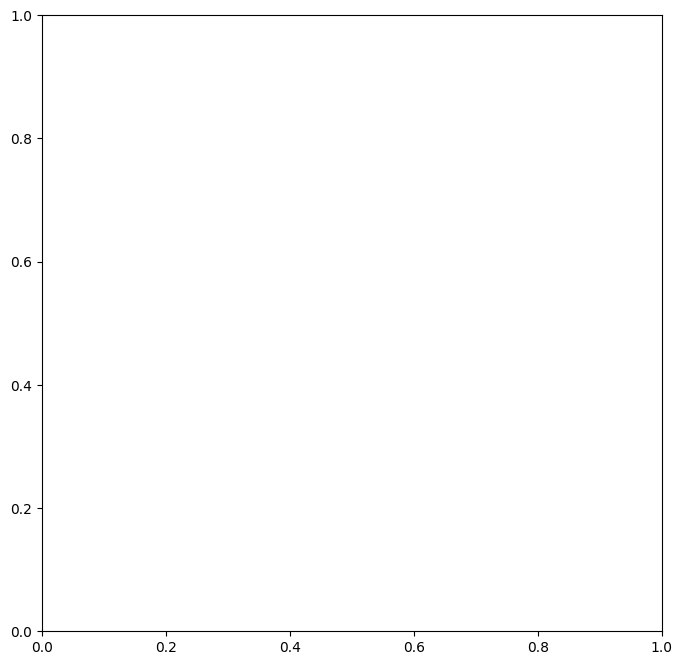

In [25]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (Hilast[-1]-Hi[0])/(Hi[0]).where(mask_ocean), cmap=cmo.balance, vmin=-1, vmax= 0)
cbar = fig.colorbar(c0, ax=ax, **colorbar_kwargs)
cbar.set_label("Ice Thickness Change [m]", fontsize= ctfs) 
ax.set_title('Relative thickness change', fontsize= tfs)

ax.set_xlabel('X [km]', fontsize=afs)
ax.set_ylabel('Y [km]', fontsize=afs)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200), fontsize=tifs)
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200), fontsize=tifs)
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

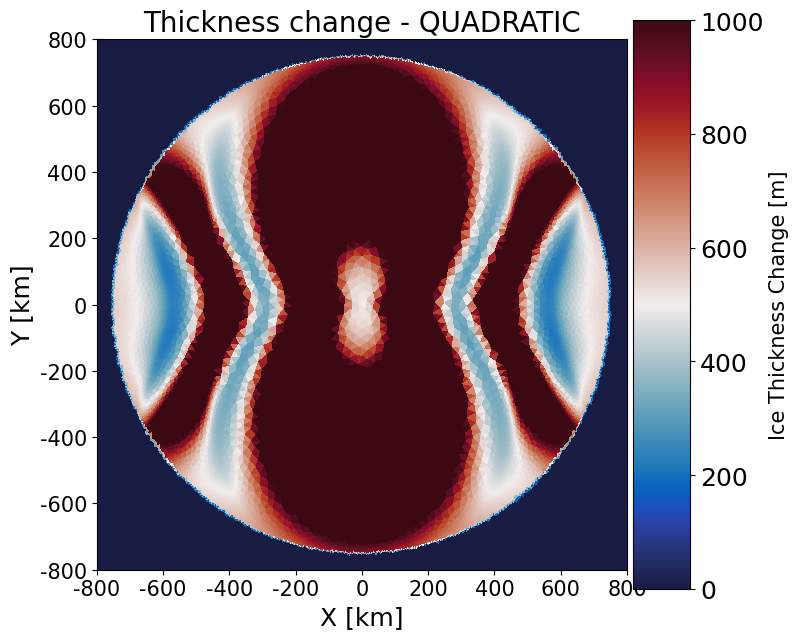

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, Hi[0], cmap=cmo.balance, vmin=0, vmax= 1000)
cbar = fig.colorbar(c0, ax=ax, **colorbar_kwargs)
cbar.set_label("Ice Thickness Change [m]", fontsize= ctfs)  # Set fontsize here
cbar.ax.tick_params(labelsize=cbfs)
ax.set_title('Thickness change - QUADRATIC', fontsize=tfs)
#ax.plot([-150000, -150000], [0, 740000], color='black', linestyle='-', linewidth=2)

#ax.text(80000, 100000, 'Halbrane A', fontsize=afs, color='black', ha='center', va='center')
ax.set_xlabel('X [km]', fontsize=afs)
ax.set_ylabel('Y [km]', fontsize=afs)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200), fontsize=tifs)
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200), fontsize=tifs)
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## Velocity


In [25]:
u_s = Lad['u_surf']
v_s = Lad['v_surf']
          
magice = np.sqrt(u_s**2 +v_s**2)
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}

m = 20
Tricc = Lad['Tricc']

fig = plt.figure(figsize=(22, 14))  # Slightly reduced figure size
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.04, 1], hspace=0.35, wspace=0.3)  # Tighter spacing

# Create subplots
axes = []
for i in range(6):
    if i < 3:
        axes.append(fig.add_subplot(gs[0, i]))  # First row
    else:
        axes.append(fig.add_subplot(gs[2, i-3]))  # Third row

# Create horizontal colorbar axis between rows
cax = fig.add_subplot(gs[1, :])  # Span all columns in middle row

for i, year in enumerate(years):
    ax = axes[i]

    # Main plot with contour lines
    c0 = ax.tripcolor(
        Tricc[0, :], 
        Tricc[1, :], 
        magice[year], 
        cmap='viridis', 
        vmin=0, 
        vmax=400

    )
    # Axis formatting
    ax.set_title(f'Year {year}', fontsize=13, pad=8)  # Reduced padding
    ax.set_xlabel('X [km]', fontsize=11)
    ax.set_ylabel('Y [km]', fontsize=11)
    ax.set_xticks(np.arange(-n, n+1, 200000))
    ax.set_yticks(np.arange(-n, n+1, 200000))
    ax.set_xticklabels(np.arange(-800, 801, 200))  # Direct labels
    ax.set_yticklabels(np.arange(-800, 801, 200))
    ax.set_xlim(-n, n)
    ax.set_ylim(-n, n)
    ax.set_aspect('equal')


    u_s_norm = u_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)
    v_s_norm = v_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)


    ax.quiver(Tricc[0, :][::m],
        Tricc[1, :][::m],
        u_s_norm,
        v_s_norm,
        scale=40,
        width=0.002,
        headwidth=3,
        headlength=4,
        headaxislength=3
    )


# Colorbar formatting
cbar = fig.colorbar(c0, cax=cax, orientation='horizontal')
cbar.set_label('Velocity [m/s]', fontsize=12, labelpad=10)
cbar.set_ticks(np.linspace(0, 400, 11))  # Add evenly spaced ticks
cax.xaxis.set_ticks_position('bottom')
cax.xaxis.set_label_position('top')

# Main title with adjusted position
plt.suptitle('LADDIE velocity Evolution (Years 0-50) with normalized arrows', 
            fontsize=16, y=0.92)  # More compact title
plt.tight_layout(pad=1.5)  # Reduced padding
plt.show()


NameError: name 'Lad' is not defined

In [26]:
Tricc = Lad['Tricc']
u_s = Lad['u_surf']
v_s = Lad['v_surf']
          
magice = np.sqrt(u_s**2 +v_s**2)
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}
u = 50
m = 10



##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 

c0 = ax.tripcolor(
    Tricc[0, :], 
    Tricc[1, :], 
    magice[u], 
    cmap='viridis', 
    vmin=0, 
    vmax=400

)

fig.colorbar(c0, ax=ax, label="Velocity magnitude [m/y]", **colorbar_kwargs)
ax.set_title('Ice velocity', fontsize=14)


u_s_norm = u_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)
v_s_norm = v_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)


plt.quiver(Tricc[0, :][::m],
    Tricc[1, :][::m],
    u_s_norm,
    v_s_norm,
    scale=50,
    width=0.002,
    headwidth=3,
    headlength=4,
    headaxislength=3
)

plt.quiverkey(
    plt.quiver(0, 0, 0, 0, scale=10000, width=0.002),
    X=0.75,
    Y=0.97,
    U= 200,
    label=' Normalized quivers',
    labelpos='E',
    coordinates='figure',
    color='k'
)

ax.set_aspect('equal')
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)

plt.tight_layout()
plt.show()

NameError: name 'Lad' is not defined

In [27]:
plt.close('all')